# Construction of Bell and GHZ states

Just to begin we import Python's libraries necessary for building quantum circuits.

In [1]:
#import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute

## Bell States

In order to construct the Bell states we will create a quantum circuit made up of two qubits. 

In [2]:
# Create a Quantum Register with 2 qubits.
q = QuantumRegister(2, 'q')

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(q)

Firstly we will get the Bell state:
\begin{equation}
|\phi_{+}\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle+|11\rangle\right).
\end{equation}

For this purpose the following gates must be placed:
* A Hadamard gate $H$ on qubit 0 generating a superposition state.
* A $CNOT$ between qubits 1 and 0.

<class 'qiskit.circuit.quantumcircuit.QuantumCircuit'>


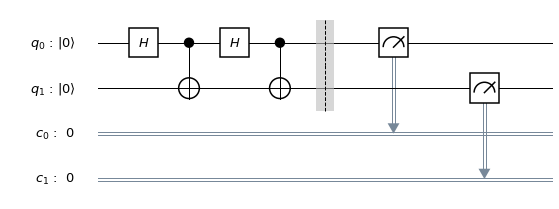

In [4]:
# Add a H gate on qubit 0, putting this qubit in superposition.
circuit.h(q[0])
# Add a CNOT gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circuit.cx(q[0], q[1])

#We would like to measure the output of the quantum circuit.
def meass(q, m):
    # Create a Classical Register with m bits.
    c = ClassicalRegister(m, 'c')
    # Create a Quantum Circuit for the measures
    meas = QuantumCircuit(q, c)
    meas.barrier(q)
    # map the quantum measurement to the classical bits
    meas.measure(q,c)
    return meas

meas = meass(q, 2)
# The Qiskit circuit object supports composition using
# the addition operator.
qc = circuit+meas
#drawing the circuit
qc.draw(output='mpl', filename='circuit_bell1.png')

In [16]:
#We now import Aer in order to run the quantum circuit of a statevector simulator backend
from qiskit import BasicAer

def outputstate(circuit):
    backend = BasicAer.get_backend('statevector_simulator')
    # Create a Quantum Program for execution 
    job = execute(circuit, backend)
    result = job.result()
    outputstate = result.get_statevector(circuit, decimals=3)
    return outputstate

output1 = outputstate(circuit)
print(output1)

[0.707+0.j 0.   +0.j 0.   +0.j 0.707+0.j]


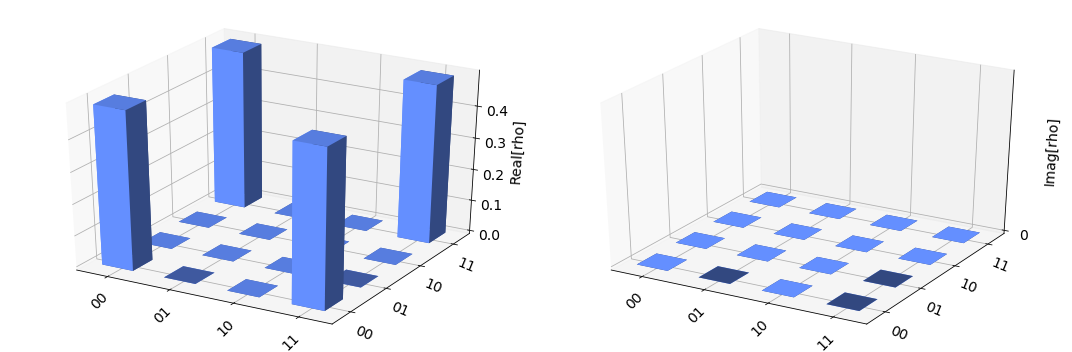

In [17]:
#Lets visualize the density matrix.
from qiskit.tools.visualization import plot_state_city
plot_state_city(output1, alpha = 1)

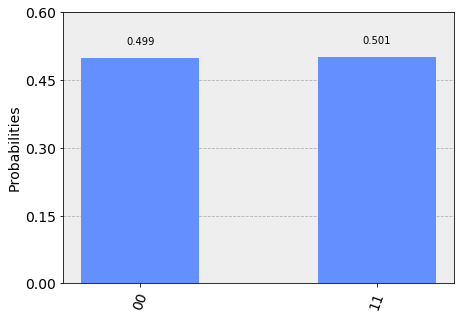

In [18]:
def simulator(qc, shots = 1024):
    #We are now going to simulate the circuit many times.
    # Use Aer's qasm_simulator
    backend_sim = BasicAer.get_backend('qasm_simulator')

    # Execute the circuit on the qasm simulator.
    # We've set the number of repeats of the circuit
    # to be 1024, which is the default.
    job_sim = execute(qc, backend_sim, shots = shots)

    # Grab the results from the job.
    result_sim = job_sim.result()

    #Give the output counts
    counts = result_sim.get_counts(qc)
    return counts

counts = simulator(qc)

from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [19]:
#Lets run it now in a real quantum computer
from qiskit import IBMQ

#IBMQ.delete_accounts()
#IBMQ.save_account('61aa59495d2989641408ec5a2dd92b6057e86e576467e2bc1bb27e1c2a3a9a00982d1d0f71364c1043ee89f163423b9227eab7571da115ba188668ed18cf6a9b', 'https://api.quantum-computing.ibm.com/api/Hubs/ibm-q/Groups/open/Projects/main')
IBMQ.load_accounts()

print("Available backends:")
print(IBMQ.backends())

#Lets choose the least busy backend
from qiskit.providers.ibmq import least_busy

large_enough_devices = IBMQ.backends(filters=lambda x: x.configuration().n_qubits < 10 and
                                                       not x.configuration().simulator)
backend = least_busy(large_enough_devices)
print("The best backend is " + backend.name())
backend = IBMQ.backends()[-1]

Available backends:
[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(ibm-q, open, main)>, <IBMQBackend('ibmqx4') from IBMQ(ibm-q, open, main)>, <IBMQBackend('ibmqx2') from IBMQ(ibm-q, open, main)>, <IBMQBackend('ibmq_16_melbourne') from IBMQ(ibm-q, open, main)>]
The best backend is ibmqx2


Job Status: job has successfully run
{'11': 382, '10': 41, '01': 76, '00': 525}
{'11': 513, '00': 511}


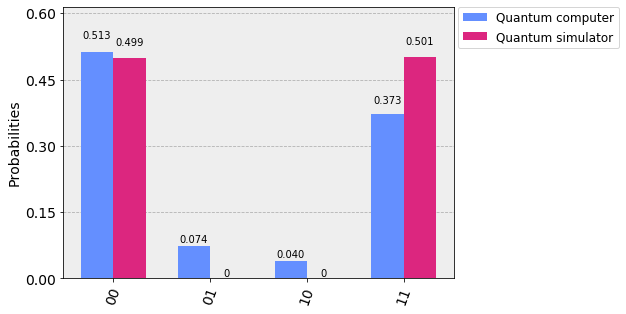

In [20]:
from qiskit.tools.monitor import job_monitor
shots = 1024           # Number of shots to run the program (experiment); maximum is 8192 shots.
max_credits = 3        # Maximum number of credits to spend on executions. 

qc1 = qc
job_exp1 = execute(qc1, backend=backend, shots=shots, max_credits=max_credits)
job_monitor(job_exp1)
result_exp1 = job_exp1.result()
counts_exp1 = result_exp1.get_counts(qc1)
print(counts_exp1)
print(counts)
legend = ['Quantum computer', 'Quantum simulator']
plot_histogram([counts_exp1,counts], legend = legend).savefig('bell1.png', bbox_inches='tight')
plot_histogram([counts_exp1,counts], legend = legend)

After this we will get the Bell state:
\begin{equation}
|\phi_{-}\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle-|11\rangle\right).
\end{equation}

For this purpose the following gates must be placed:
* A $NOT$ gate $H$ on qubit 0 changing it state from $|0\rangle$ to $|1\rangle$.
* A Hadamard gate $H$ on qubit 0 generating a superposition state.
* A $CNOT$ between qubits 1 and 0.

In [21]:
#Proceeding as it was done before.
circuit = QuantumCircuit(q)

#Add a X gate on qubit 0.
circuit.x(q[0])
# Add a H gate on qubit 0, putting this qubit in superposition.
circuit.h(q[0])
# Add a CNOT gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circuit.cx(q[0], q[1])

#Lets now generate the circuit and represented.
qc = circuit+meas

#drawing the circuit
qc.draw(output='mpl', filename='circuit_bell2.png')

#Getting the outputstate.
output2 = outputstate(circuit)
print(output2)

[ 0.707+0.j  0.   +0.j  0.   +0.j -0.707+0.j]


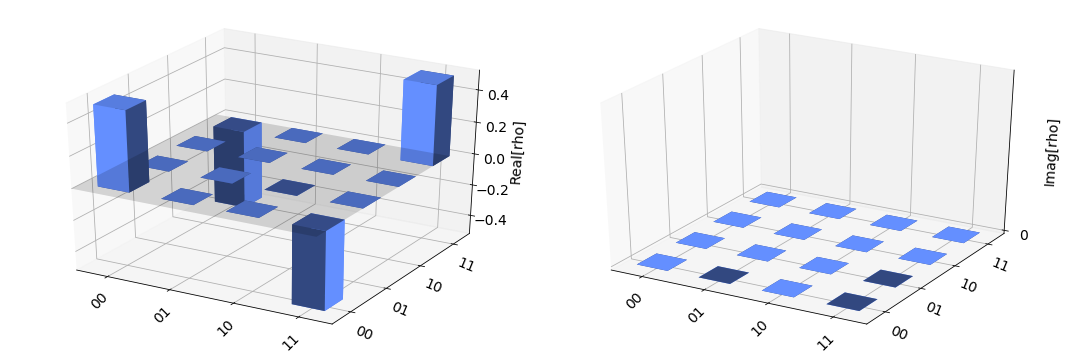

In [22]:
#Lets visualize the density matrix.
plot_state_city(output2)

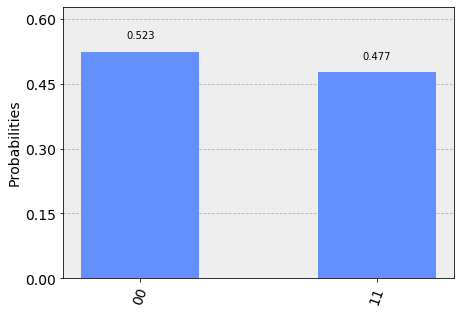

In [23]:
#We are now going to simulate the circuit many times.
counts = simulator(qc)
plot_histogram(counts)

Job Status: job has successfully run
{'11': 478, '10': 59, '01': 50, '00': 437}
{'11': 488, '00': 536}


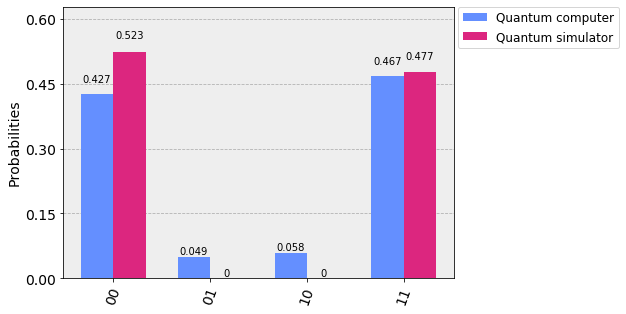

In [24]:
#Quantum device
qc2 = qc
job_exp2 = execute(qc2, backend=backend, shots=shots, max_credits=max_credits)
job_monitor(job_exp2)
result_exp2 = job_exp2.result()
counts_exp2 = result_exp2.get_counts(qc2)
print(counts_exp2)
print(counts)
legend = ['Quantum computer', 'Quantum simulator']
plot_histogram([counts_exp2,counts], legend = legend).savefig('bell2.png', bbox_inches='tight')
plot_histogram([counts_exp2,counts], legend = legend)

Finally we will get the Bell states:
\begin{equation}
|\psi_{+}\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle+|10\rangle\right)\\
|\psi_{-}\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle-|10\rangle\right)\\
\end{equation}

In the first state the following gates must be placed:
* A Hadamard gate $H$ on qubit 0 generating a superposition state.
* A $CNOT$ between qubits 1 and 0.
* A $NOT$ gate $H$ on qubit 1.

While in the second one the gates will be the following:
* A $NOT$ gate on qubit 0 changing it state from $|0\rangle$ to $|1\rangle$.
* A Hadamard gate $H$ on qubit 0 generating a superposition state.
* A $CNOT$ between qubits 1 and 0.
* A $NOT$ gate $H$ on qubit 1.

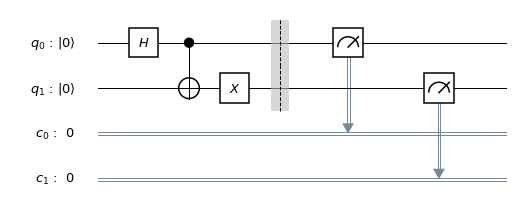

In [25]:
#Proceeding as it was done before.
circ1 = QuantumCircuit(q)
circ2 = QuantumCircuit(q)

#Psi+:
circ1.h(q[0])
circ1.cx(q[0], q[1])
circ1.x(q[1])

#Psi_:
circ2.x(q[0])
circ2.h(q[0])
circ2.cx(q[0], q[1])
circ2.x(q[1])

# Generating the quantum circuits.
qc1 = circ1+meas
qc2 = circ2+meas

#drawing the circuits
qc1.draw(output='mpl', filename='circuit_bell3.png')

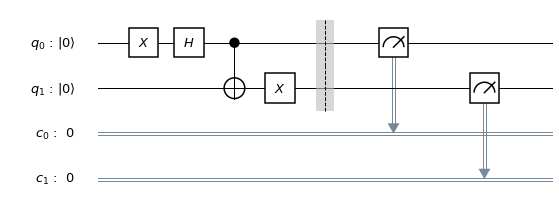

In [26]:
qc2.draw(output='mpl', filename='circuit_bell4.png')

In [27]:
#Getting the outputstates.
output3 = outputstate(circ1)
print(output3)

output4 = outputstate(circ2)
print(output4)

[0.   +0.j 0.707+0.j 0.707+0.j 0.   +0.j]
[ 0.   +0.j -0.707+0.j  0.707+0.j  0.   +0.j]


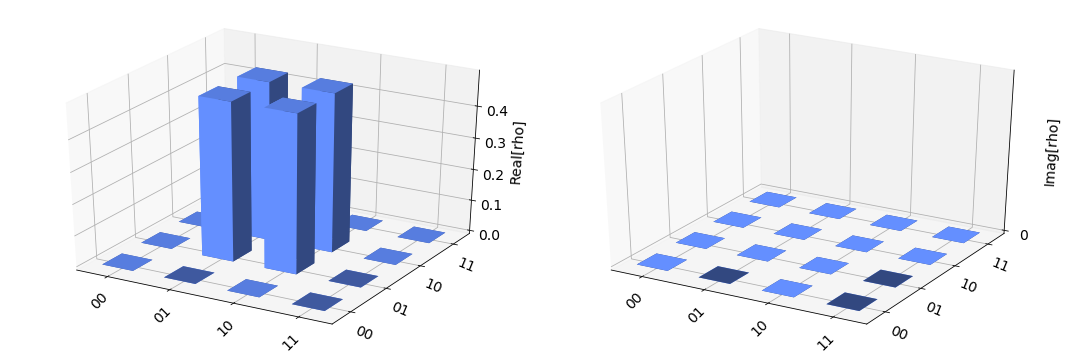

In [28]:
#Lets visualize the density matrices.
plot_state_city(output3)

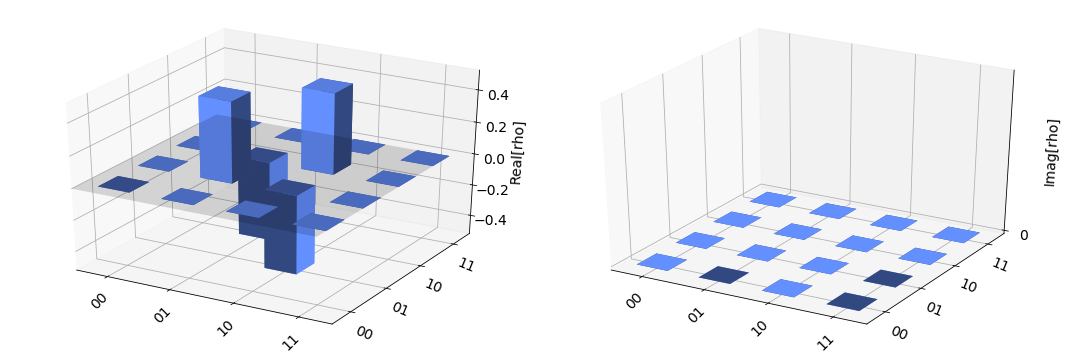

In [29]:
plot_state_city(output4)

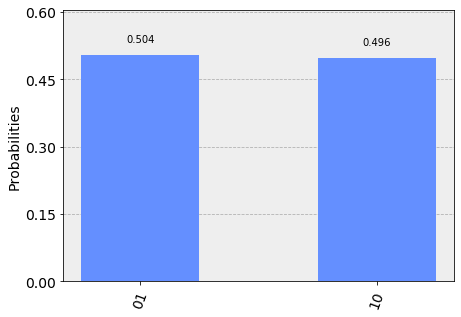

In [30]:
#We are now going to simulate the circuit many times.
counts1 = simulator(qc1)
plot_histogram(counts1)

Job Status: job has successfully run
{'11': 30, '10': 511, '01': 412, '00': 71}
{'11': 488, '00': 536}


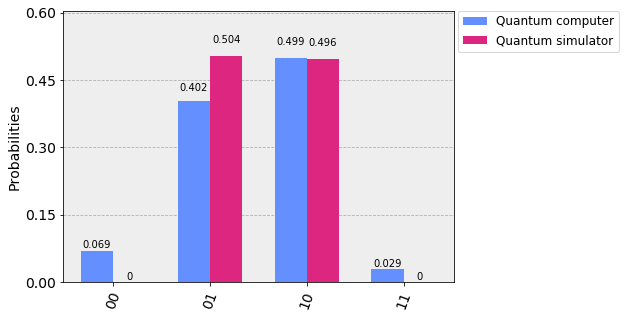

In [31]:
#For a quantum device.
job_exp1 = execute(qc1, backend=backend, shots=shots, max_credits=max_credits)
job_monitor(job_exp1)
result_exp1 = job_exp1.result()
counts_exp1 = result_exp1.get_counts(qc1)
print(counts_exp1)
print(counts)
legend = ['Quantum computer', 'Quantum simulator']
plot_histogram([counts_exp1,counts1], legend = legend).savefig('bell3.png', bbox_inches='tight')
plot_histogram([counts_exp1,counts1], legend = legend)

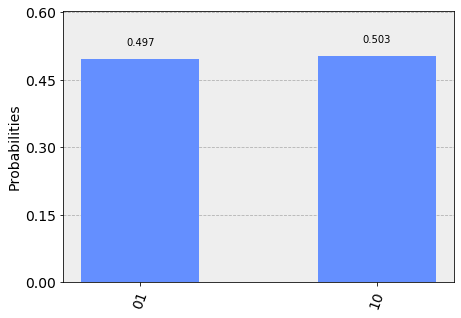

In [32]:
#We are now going to simulate the circuit many times.
counts2 = simulator(qc2)
plot_histogram(counts2)

Job Status: job has successfully run
{'11': 12, '10': 385, '01': 545, '00': 82}
{'11': 488, '00': 536}


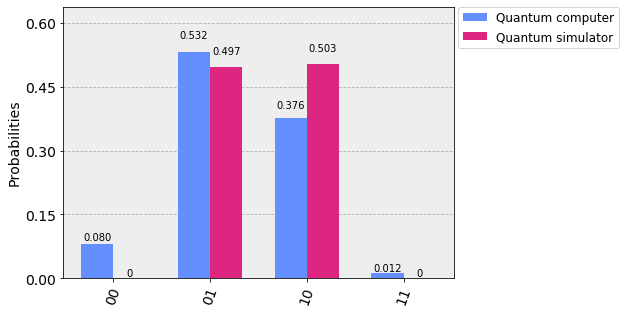

In [33]:
#For a quantum device

job_exp2 = execute(qc2, backend=backend, shots=shots, max_credits=max_credits)
job_monitor(job_exp2)
result_exp2 = job_exp2.result()
counts_exp2 = result_exp2.get_counts(qc2)
print(counts_exp2)
print(counts)
legend = ['Quantum computer', 'Quantum simulator']
plot_histogram([counts_exp2,counts2], legend = legend).savefig('bell4.png', bbox_inches='tight')
plot_histogram([counts_exp2,counts2], legend = legend)

## GHZ State

We are now going to create the GHZ state for n qubits:

\begin{equation}
|\phi\rangle = \frac{1}{\sqrt{2}}\left(|0...0\rangle+|1...1\rangle\right).
\end{equation}

For this purpose the following gates must be placed:
* A Hadamard gate $H$ on qubit 0 generating a superposition state.
* A $CNOT$ between qubits 0 and the rest.

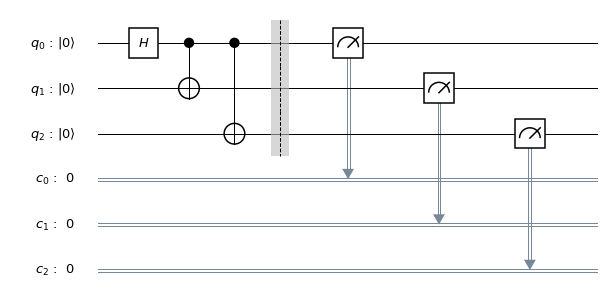

In [34]:
#Firstly we set the number of qubits, n:
n = 3

# Create a Quantum Register with n qubits.
q = QuantumRegister(n, 'q')

# Create a Quantum Circuit acting on the q register
circuito = QuantumCircuit(q)

# Add a H gate on qubit 0, putting this qubit in superposition.
circuito.h(q[0])
# Add a CNOT gate on control qubit 0 and target qubit j, where j represent all the other qubits.
for j in range(1, n):
    circuito.cx(q[0], q[j])

meas = meass(q, n)
# The Qiskit circuit object supports composition using
# the addition operator.
qc = circuito+meas

#drawing the circuit
qc.draw(output='mpl', filename='circuit_ghz.png')

In [35]:
#Getting the outputstate.
output5 = outputstate(circuito)
print(output5)

[0.707+0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j
 0.707+0.j]


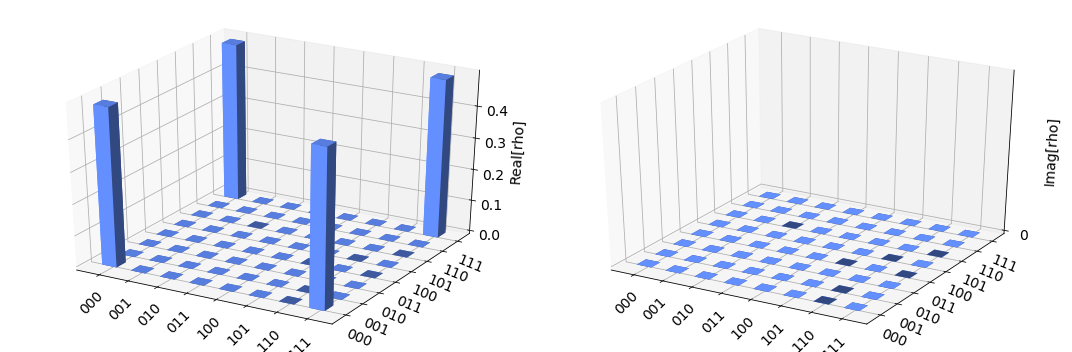

In [36]:
#Lets visualize the density matrix.
plot_state_city(output5)

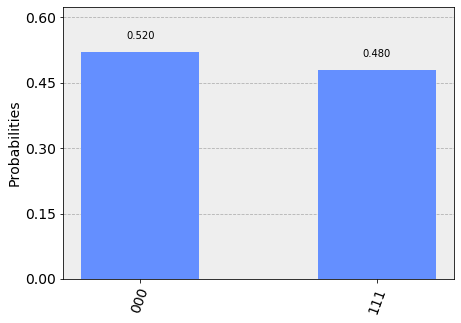

In [37]:
#We are now going to simulate the circuit many times.
counts = simulator(qc)
plot_histogram(counts)

Job Status: job has successfully run
{'010': 120, '000': 468, '111': 224, '110': 41, '100': 28, '011': 30, '101': 98, '001': 15}
{'000': 532, '111': 492}


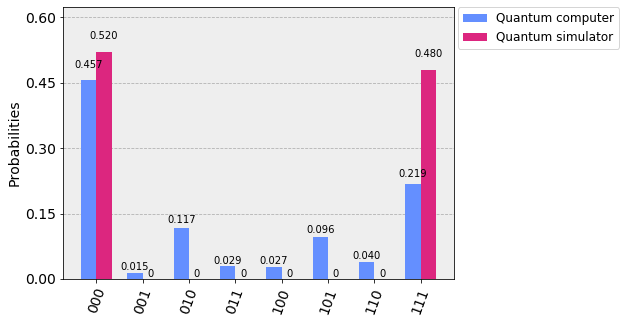

In [38]:
#Quantum device
qc2 = qc
job_exp2 = execute(qc2, backend=backend, shots=shots, max_credits=max_credits)
job_monitor(job_exp2)
result_exp2 = job_exp2.result()
counts_exp2 = result_exp2.get_counts(qc2)
print(counts_exp2)
print(counts)
legend = ['Quantum computer', 'Quantum simulator']
plot_histogram([counts_exp2,counts], legend = legend).savefig('ghz.png', bbox_inches='tight')
plot_histogram([counts_exp2,counts], legend = legend)

## Bibliography

**[1]** Sipser, M. (1992, July). The history and status of the P versus NP question. In Proceedings of the twenty-fourth annual ACM symposium on Theory of computing (pp. 603-618). ACM.

**[2]** NP-Completeness | Set 1 (Introduction). (2018, September 07). Retrieved from https://www.geeksforgeeks.org/np-completeness-set-1/

**[3]** P versus NP problem. (2019, January 13). Retrieved from https://en.wikipedia.org/wiki/P_versus_NP_problem

**[4]** UNIVERSITY OF PENNSYLVANIA, S. (2017). Chapter 10. Some NP-Complete Problems.

**[5]** Exact Cover Problem and Algorithm X | Set 1. (2018, February 15). Retrieved from https://www.geeksforgeeks.org/exact-cover-problem-algorithm-x-set-1/

**[6]** Variational-Quantum-Eigensolver (VQE)¶. (n.d.). Retrieved from https://grove-docs.readthedocs.io/en/latest/vqe.html

**[7]** Qiskit. (2019, February 11). Qiskit/qiskit-tutorials. Retrieved from https://github.com/Qiskit/qiskit-tutorials